In [41]:
%%capture
%run ch4_linear_algebra.ipynb

In [42]:
# Derivative (limit of the difference quotients as h approches zero)

from typing import Callable

def difference_quotient(f: Callable[[float], float], 
                        x: float, 
                        h: float) -> float:
    
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative_of_square(x: float) -> float:
    return 2 * x

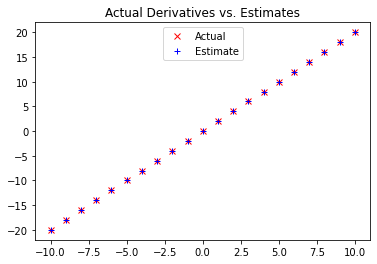

In [43]:
# Estimating derivative (y = x^2)

xs = range(-10, 11)
actuals = [derivative_of_square(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs]

# print(actuals)
# print(estimates)

# plot to show they are basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [44]:
# Partial derivative

def partial_difference_quotient(f: Callable[[Vector], float], 
                       v: Vector, 
                       i: int, 
                       h: float) -> float:
    
    """Returns the i-th partial difference quotient of f at v"""
    
    w = [v_j + (h if j == i else 0) # add h to just the ith element of v
         for j, v_j in enumerate(v)]
   
    return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float], 
                      v: Vector, 
                      h: float = 0.0001) -> float:
    
    return [partial_difference_quotient(f, v, i, h) 
            for i in range(len(v))]

In [45]:
# Using gradients to find the minimum among the given 3D vectors

import random

def gradient_step(v: Vector, 
                  gradient: Vector, 
                  step_size: float) -> Vector:
    
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute gradient at v
    v = gradient_step(v, grad, -0.01) # take a negative gradient step
    print(epoch, grad, v)
    
assert distance(v, [0, 0, 0]) < 0.001 # v should close to zero

0 [17.903183257955398, -18.457022278289514, -17.363421697842988] [8.772559796398145, -9.043940916361862, -8.508076631943064]
1 [17.54511959279629, -18.087881832723724, -17.016153263886128] [8.597108600470182, -8.863062098034625, -8.337915099304203]
2 [17.194217200940365, -17.72612419606925, -16.675830198608406] [8.425166428460779, -8.685800856073932, -8.171156797318119]
3 [16.850332856921558, -17.371601712147864, -16.342313594636238] [8.256663099891563, -8.512084838952454, -8.007733661371757]
4 [16.513326199783126, -17.024169677904908, -16.015467322743515] [8.091529837893733, -8.341843142173405, -7.847578988144322]
5 [16.183059675787465, -16.68368628434681, -15.695157976288645] [7.929699241135858, -8.175006279329937, -7.690627408381435]
6 [15.859398482271716, -16.350012558659873, -15.38125481676287] [7.771105256313141, -8.011506153743339, -7.5368148602138065]
7 [15.542210512626282, -16.023012307486677, -15.073629720427613] [7.615683151186878, -7.851276030668472, -7.38607856300953]
8 [1

442 [0.002370585988968235, -0.0024439206023065927, -0.0022991153921838544] [0.0011615871345944352, -0.0011975210951302303, -0.0011265665421700886]
443 [0.0023231742691888703, -0.0023950421902604606, -0.0022531330843401772] [0.0011383553919025464, -0.0011735706732276256, -0.0011040352113266868]
444 [0.002276710783805093, -0.0023471413464552513, -0.0022080704226533736] [0.0011155882840644955, -0.0011500992597630732, -0.001081954507100153]
445 [0.002231176568128991, -0.0023001985195261463, -0.002163909014200306] [0.0010932765183832055, -0.0011270972745678117, -0.0010603154169581501]
446 [0.002186553036766411, -0.0022541945491356234, -0.0021206308339163002] [0.0010714109880155414, -0.0011045553290764554, -0.0010391091086189872]
447 [0.002142821976031083, -0.002209110658152911, -0.0020782182172379743] [0.0010499827682552306, -0.0010824642224949263, -0.0010183269264466073]
448 [0.002099965536510461, -0.0021649284449898527, -0.0020366538528932146] [0.0010289831128901259, -0.001060814938045027

775 [2.8388269457160173e-06, -2.9266466988772185e-06, -2.753239391869802e-06] [1.3910252034008485e-06, -1.434056882449837e-06, -1.349087302016203e-06]
776 [2.782050406801697e-06, -2.868113764899674e-06, -2.698174604032406e-06] [1.3632046993328316e-06, -1.4053757448008402e-06, -1.3221055559758789e-06]
777 [2.726409398665663e-06, -2.8107514896016805e-06, -2.6442111119517578e-06] [1.335940605346175e-06, -1.3772682299048234e-06, -1.2956634448563612e-06]
778 [2.67188121069235e-06, -2.754536459809647e-06, -2.5913268897127224e-06] [1.3092217932392515e-06, -1.349722865306727e-06, -1.269750175959234e-06]
779 [2.618443586478503e-06, -2.699445730613454e-06, -2.539500351918468e-06] [1.2830373573744664e-06, -1.3227284080005925e-06, -1.2443551724400494e-06]
780 [2.566074714748933e-06, -2.645456816001185e-06, -2.488710344880099e-06] [1.2573766102269772e-06, -1.2962738398405807e-06, -1.2194680689912485e-06]
781 [2.5147532204539544e-06, -2.5925476796811615e-06, -2.438936137982497e-06] [1.23222907802243

In [46]:
# Using gradients to fit the model


def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta # model parameters
    predicted = slope * x + intercept # prediction of the model
    error = (predicted - y)
    
    squared_error = error ** 2 # we will minimize squared error
    grad = [2 * error * x, 2 * error]
    
    return grad

inputs = [(x, 20 * x + 5) for x in range (-50, 50)] # y = 20x + 5

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients (gradient of the mean squared error)
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    if epoch % 10 == 0:
        print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.42575997011008, -0.4209139082040238]
10 [20.230862182699244, -0.3057331037456963]
20 [20.000955739789063, -0.20046436080031171]
30 [19.997009584564125, -0.09741449982361078]
40 [19.997000393961468, 0.0035911046142368796]
50 [19.997058638413943, 0.10259523676225915]
60 [19.99711690087318, 0.19963759559787997]
70 [19.997174029286885, 0.29475705446453193]
80 [19.997230026053806, 0.38799171574844443]
90 [19.997284913247753, 0.47937892682301325]
100 [19.997338712848883, 0.5689552950210622]
110 [19.997391446407807, 0.6567567022989925]
120 [19.997443135048208, 0.7428183196101636]
130 [19.997493799475205, 0.8271746209934578]
140 [19.997543459983653, 0.909859397382682]
150 [19.99759213646625, 0.9909057701423335]
160 [19.997639848421525, 1.0703462043351561]
170 [19.99768661496165, 1.1482125217267956]
180 [19.997732454820074, 1.2245359135327705]
190 [19.997777386359047, 1.2993469529128585]
200 [19.99782142757698, 1.372675607217906]
210 [19.997864596115626, 1.4445512499939688]
220 [19.997906

1930 [19.999931693728186, 4.886270016407344]
1940 [19.999933047220917, 4.8885235826144084]
1950 [19.99993437389411, 4.890732494276654]
1960 [19.999935674279197, 4.8928976362264684]
1970 [19.99993694889708, 4.89501987576324]
1980 [19.99993819825833, 4.8971000630007655]
1990 [19.999939422863417, 4.899139031207788]
2000 [19.999940623202885, 4.901137597141781]
2010 [19.999941799757558, 4.903096561376125]
2020 [19.99994295299873, 4.9050167086207885]
2030 [19.99994408338836, 4.9068988080366704]
2040 [19.999945191379254, 4.908743613543698]
2050 [19.999946277415248, 4.9105518641228345]
2060 [19.999947341931374, 4.912324284112094]
2070 [19.999948385354053, 4.914061583496685]
2080 [19.99994940810125, 4.915764458193424]
2090 [19.999950410582652, 4.917433590329492]
2100 [19.999951393199826, 4.919069648515683]
2110 [19.999952356346384, 4.920673288114226]
2120 [19.999953300408137, 4.922245151501314]
2130 [19.999954225763254, 4.923785868324412]
2140 [19.999955132782404, 4.925296055754493]
2150 [19.99

3870 [19.999998593247426, 4.997657756121773]
3880 [19.999998621122312, 4.997704167819779]
3890 [19.99999864844485, 4.997749659867302]
3900 [19.999998675225996, 4.997794250487272]
3910 [19.99999870147647, 4.997837957541526]
3920 [19.999998727206787, 4.997880798537969]
3930 [19.99999875242726, 4.997922790637589]
3940 [19.999998777147987, 4.997963950661323]
3950 [19.99999880137887, 4.998004295096807]
3960 [19.99999882512962, 4.998043840104966]
3970 [19.999998848409742, 4.998082601526501]
3980 [19.999998871228566, 4.998120594888222]
3990 [19.99999889359524, 4.998157835409285]
4000 [19.999998915518713, 4.998194338007265]
4010 [19.99999893700777, 4.9982301173041535]
4020 [19.999998958071025, 4.998265187632204]
4030 [19.99999897871691, 4.998299563039675]
4040 [19.999998998953693, 4.998333257296458]
4050 [19.999999018789484, 4.998366283899591]
4060 [19.999999038232225, 4.998398656078673]
4070 [19.99999905728971, 4.998430386801153]
4080 [19.99999907596957, 4.998461488777529]
4090 [19.9999990942

In [47]:
# Minibatch gradient descent

from typing import TypeVar, List, Iterator

T = TypeVar('T') # this allows us to type generic functions

def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    
    # start index 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: 
        random.shuffle(batch_starts) # shuffle the batches
        
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]
        
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs]) # Compute the mean of the gradients
        theta = gradient_step(theta, grad, -learning_rate) # Take a step in that direction
    
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [22.54948900522514, 0.2572158689395437]
1 [19.660227953483236, 0.3061602936653052]
2 [20.041692455827942, 0.352670253264109]
3 [19.991364007792896, 0.39897416226693044]
4 [19.998039422154644, 0.4447830830117802]
5 [19.997189025182134, 0.4901403597967913]
6 [19.997331858726163, 0.5350454181527683]
7 [19.997343264222707, 0.5795034303948329]
8 [19.997371719184486, 0.6235187594165533]
9 [19.997397624998886, 0.6670958247283809]
10 [19.997423571993906, 0.7102389886257736]
11 [19.99744922114206, 0.7529525717122549]
12 [19.997474620112424, 0.7952408513404404]
13 [19.997499765494428, 0.8371080623033081]
14 [19.997524660592184, 0.8785583972235622]
15 [19.997549307794948, 0.9195960069780694]
16 [19.99757370958461, 0.9602250011129274]
17 [19.997597868402988, 1.0004494482550774]
18 [19.997621786669594, 1.0402733765197314]
19 [19.99764546677961, 1.0797007739137512]
20 [19.997668911104377, 1.1187355887350128]
21 [19.99769212199164, 1.1573817299677913]
22 [19.997715101765756, 1.1956430676742114]
23 

218 [19.999678594387323, 4.464859461850926]
219 [19.999681794655423, 4.4701879101670645]
220 [19.999684963058137, 4.475463302585857]
221 [19.999688099912746, 4.4806861673902265]
222 [19.999691205533374, 4.4858570276029255]
223 [19.999694280231026, 4.490976401038918]
224 [19.9996973243136, 4.496044800357237]
225 [19.99970033808594, 4.50106273311231]
226 [19.999703321849843, 4.506030701804799]
227 [19.99970627590411, 4.510949203931916]
228 [19.99970920054456, 4.515818732037242]
229 [19.99971209606407, 4.520639773760048]
230 [19.9997149627526, 4.52541281188414]
231 [19.999717800897223, 4.53013832438619]
232 [19.999720610782152, 4.534816784483611]
233 [19.999723392688775, 4.53944866068194]
234 [19.999726146895675, 4.544034416821761]
235 [19.99972887367866, 4.548574512125149]
236 [19.999731573310786, 4.553069401241657]
237 [19.999734246062406, 4.557519534293848]
238 [19.99973689220117, 4.5619253569223694]
239 [19.999739511992058, 4.566287310330577]
240 [19.99974210569743, 4.570605831328726]

411 [19.999953411576858, 4.922430247486394]
412 [19.999953875462488, 4.923202617336367]
413 [19.999954334729157, 4.923967296621837]
414 [19.999954789422866, 4.92472436191853]
415 [19.99995523958914, 4.925473889039702]
416 [19.99995568527307, 4.926215953043727]
417 [19.999956126519272, 4.926950628241614]
418 [19.99995656337195, 4.927677988204453]
419 [19.999956995874836, 4.928398105770774]
420 [19.999957424071244, 4.92911105305385]
421 [19.999957848004065, 4.929816901448917]
422 [19.999958267715737, 4.930515721640319]
423 [19.999958683248302, 4.931207583608587]
424 [19.999959094643366, 4.931892556637451]
425 [19.99995950194213, 4.932570709320776]
426 [19.999959905185374, 4.93324210956943]
427 [19.999960304413488, 4.933906824618086]
428 [19.99996069966645, 4.9345649210319555]
429 [19.99996109098383, 4.935216464713452]
430 [19.99996147840483, 4.935861520908793]
431 [19.99996186196824, 4.9365001542145315]
432 [19.99996224171247, 4.937132428584029]
433 [19.999962617675546, 4.937758407333853

604 [19.999993246909558, 4.988756100358545]
605 [19.99999331415076, 4.988868057001408]
606 [19.999993380722437, 4.988978898880686]
607 [19.99999344663125, 4.989088637096191]
608 [19.999993511883805, 4.989197282637216]
609 [19.99999357648663, 4.98930484638363]
610 [19.999993640446203, 4.989411339106971]
611 [19.99999370376892, 4.989516771471524]
612 [19.99999376646113, 4.9896211540353885]
613 [19.999993828529103, 4.989724497251537]
614 [19.999993889979063, 4.989826811468857]
615 [19.999993950817156, 4.989928106933196]
616 [19.999994011049484, 4.99002839378838]
617 [19.999994070682064, 4.990127682077231]
618 [19.999994129720882, 4.990225981742575]
619 [19.999994188171843, 4.9903233026282345]
620 [19.999994246040803, 4.9904196544800214]
621 [19.999994303333555, 4.9905150469467]
622 [19.999994360055837, 4.990609489580967]
623 [19.99999441621333, 4.990702991840396]
624 [19.999994471811657, 4.990795563088399]
625 [19.999994526856387, 4.990887212595148]
626 [19.99999458135303, 4.9909779495385

794 [19.99999899129289, 4.998320502059245]
795 [19.999999001336693, 4.998337224989647]
796 [19.999999011280483, 4.998353781408144]
797 [19.999999021125262, 4.998370172972711]
798 [19.999999030872015, 4.998386401324817]
799 [19.999999040521722, 4.998402468089584]
800 [19.999999050075342, 4.998418374875954]
801 [19.999999059533838, 4.998434123276848]
802 [19.999999068898155, 4.998449714869325]
803 [19.999999078169232, 4.998465151214743]
804 [19.99999908734799, 4.998480433858913]
805 [19.99999909643536, 4.998495564332254]
806 [19.999999105432245, 4.998510544149945]
807 [19.999999114339545, 4.99852537481208]
808 [19.999999123158158, 4.998540057803816]
809 [19.99999913188896, 4.9985545945955225]
810 [19.99999914053283, 4.998568986642928]
811 [19.99999914909063, 4.998583235387265]
812 [19.99999915756322, 4.998597342255419]
813 [19.999999165951447, 4.998611308660062]
814 [19.999999174256153, 4.998625135999807]
815 [19.99999918247817, 4.998638825659335]
816 [19.999999190618315, 4.9986523790095

In [48]:
# Stochastic gradient descent

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate) # take gradient steps based on one training example at a time
    
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.102360469002758, -0.09469528522626752]
1 [20.097968177337698, 0.12388632609327119]
2 [20.093764967209484, 0.3330899510288684]
3 [20.089742106438184, 0.533317953313884]
4 [20.085891828823815, 0.7249554209611713]
5 [20.082206750824547, 0.9083709201506585]
6 [20.078679780839128, 1.0839172045206056]
7 [20.075304103125085, 1.2519318924834506]
8 [20.072073289889374, 1.4127381180796281]
9 [20.0689810683435, 1.5666451516523396]
10 [20.0660215059183, 1.7139489939198826]
11 [20.0631889412678, 1.8549329469192655]
12 [20.060477910212896, 1.9898681582016475]
13 [20.057883178000637, 2.1190141413435333]
14 [20.055399761119805, 2.2426192755719576]
15 [20.05302289446888, 2.360921284055664]
16 [20.050748024177043, 2.4741476913124107]
17 [20.048570758462947, 2.5825162601681764]
18 [20.046486887714067, 2.6862354098759336]
19 [20.044492407546866, 2.78550461734824]
20 [20.042583516914398, 2.8805148019676547]
21 [20.04075651388889, 2.9714486919764513]
22 [20.039007923106283, 3.058481176102212]
23 [20.0